In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing, tree
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans, vq
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image  

In [2]:
df = pd.read_csv('data/german_num_data.csv')
imp = df[['account_status', 'credit_history', 'duration(months)', 'savings_account', 'credit_amount']]

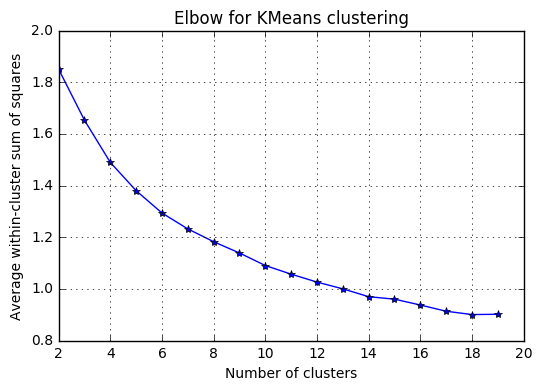

In [3]:
z = preprocessing.scale(imp)
X = np.array(z).astype(float)

K = range(2, 20)

# scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

# alternative: scipy.spatial.distance.cdist
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot
kIdx = 2

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

In [4]:
clf = KMeans(n_clusters=4)
results = clf.fit(z)
df['cluster'] = pd.Series(clf.predict(z), index=df.index)
imp['cluster'] = pd.Series(clf.predict(z), index=df.index)
pd.crosstab(df['cluster'], df['fraud']).transpose()

C:\Users\Jonathan\AppData\Local\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


cluster,0,1,2,3
fraud,,,,
1,173,249,71,207
2,32,37,77,154


In [5]:
clf = KMeans(n_clusters=35)
results = clf.fit(z)
df['cluster'] = pd.Series(clf.predict(z), index=df.index)
imp['cluster'] = pd.Series(clf.predict(z), index=df.index)
pd.crosstab(df['cluster'], df['fraud']).transpose()

C:\Users\Jonathan\AppData\Local\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


cluster,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
fraud,,,,,,,,,,,,,,,,,,,,,
1,27,36,63,34,4,9,25,4,30,9,...,23,36,16,1,16,5,9,6,18,41
2,8,1,9,39,14,14,8,6,27,3,...,1,11,2,7,6,2,4,9,8,4


In [6]:
df2 = imp

cluster = []

for i in df2['cluster']:
    if i == 28:
        cluster.append(1)
    else:
        cluster.append(0)
        
df2['cluster'] = cluster

C:\Users\Jonathan\AppData\Local\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
X = np.array(df2.drop(['cluster'], 1))
y = np.array(df2['cluster'])
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

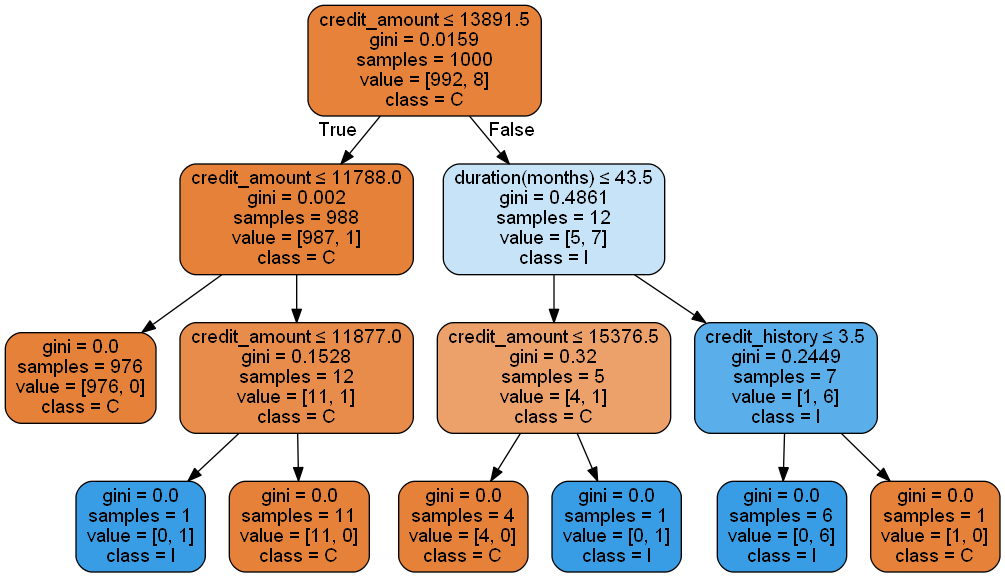

In [8]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = df2.columns,  
                         class_names='Cluster',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 